In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [177]:
# график плотностb распределения для номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df2.loc[df2.loc[:, column].isin(df2.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [178]:
# теста Стьюдента для определения статистической разницы в распределении оценок по номинативным признакам 
def get_stat_dif(column): 
    cols = df2.loc[:, column].value_counts().index[:100]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df2.loc[df2.loc[:, column] == comb[0], 'score'], 
                        df2.loc[df2.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [179]:
df = pd.read_csv('C:/Users/Chichvarina Marina/Downloads/stud_math.csv')
df.info() # выявляем лишний столбец "studytime, granular", не указанный в описании датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [180]:
df = df.drop(['studytime, granular'], axis=1) # удалим лишний столбец

In [181]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [182]:
print(df.shape)
print(df.dtypes)

(395, 29)
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout         float64
health        float64
absences      float64
score         float64
dtype: object


<AxesSubplot:>

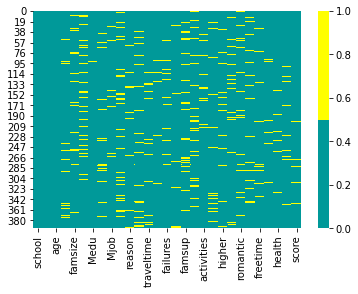

In [183]:
# используем тепловую карту для предварительной оценки объёма пропущенных значений
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, голубой - не пропущенные
colours = ['#009999', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [184]:
# выявим количество пропущенных значений в процентах
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# в датасете нет большого объёма пропущенных значений по одному признаку

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
Pstatus - 11%
Medu - 1%
Fedu - 6%
Mjob - 5%
Fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


In [185]:
df2 = df.copy() # дальнейшие действия будем делать с копией изначального для дальнейшего заполнения пропущенных значений

In [186]:
df2_numeric = df2.select_dtypes(include=[np.number]) # определим колонки с числовыми признаками
numeric_cols = df2_numeric.columns.values
print(numeric_cols)

['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'health' 'absences' 'score']


In [187]:
for col in numeric_cols: # выберем все столбцы для дальнейшего заполнения отсутствующих числовых признаков 
    missing = df2[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # выберем только те столбцы, где числовой признак не определён
        print('заполнение недостающих значений для: {}'.format(col))
        df2['{}_ismissing'.format(col)] = missing
        med = df2[col].median() # заполним недостающие данные наиболее часто повторящимися значениями
        df2[col] = df2[col].fillna(med)

заполнение недостающих значений для: Medu
заполнение недостающих значений для: Fedu
заполнение недостающих значений для: traveltime
заполнение недостающих значений для: studytime
заполнение недостающих значений для: failures
заполнение недостающих значений для: famrel
заполнение недостающих значений для: freetime
заполнение недостающих значений для: goout
заполнение недостающих значений для: health
заполнение недостающих значений для: absences
заполнение недостающих значений для: score


In [188]:
# тем же способом заполним недостающие значения для категориальных признаков
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'famsize' 'Pstatus' 'Mjob' 'Fjob' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [189]:
for col in non_numeric_cols: # выберем все столбцы для дальнейшего заполнения отсутствующих номинативных значений 
    missing = df2[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # выберем только те столбцы, где номинативный признак не определён
        print('заполнение недостающих значений для: {}'.format(col))
        df2['{}_ismissing'.format(col)] = missing
        
        top = df2[col].describe()['top'] # заполним недостающие данные наиболее часто повторящимися значениями
        df2[col] = df2[col].fillna(top)

заполнение недостающих значений для: address
заполнение недостающих значений для: famsize
заполнение недостающих значений для: Pstatus
заполнение недостающих значений для: Mjob
заполнение недостающих значений для: Fjob
заполнение недостающих значений для: reason
заполнение недостающих значений для: guardian
заполнение недостающих значений для: schoolsup
заполнение недостающих значений для: famsup
заполнение недостающих значений для: paid
заполнение недостающих значений для: activities
заполнение недостающих значений для: nursery
заполнение недостающих значений для: higher
заполнение недостающих значений для: internet
заполнение недостающих значений для: romantic


In [190]:
# проверим теперь количество пропущенных значений
print(df2.isnull().sum())

school                  0
sex                     0
age                     0
address                 0
famsize                 0
                       ..
activities_ismissing    0
nursery_ismissing       0
higher_ismissing        0
internet_ismissing      0
romantic_ismissing      0
Length: 55, dtype: int64


In [191]:
df2.drop(df2.iloc[:, 29:55], inplace = True, axis = 1) # удалим лишние столбцы

In [192]:
df2.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


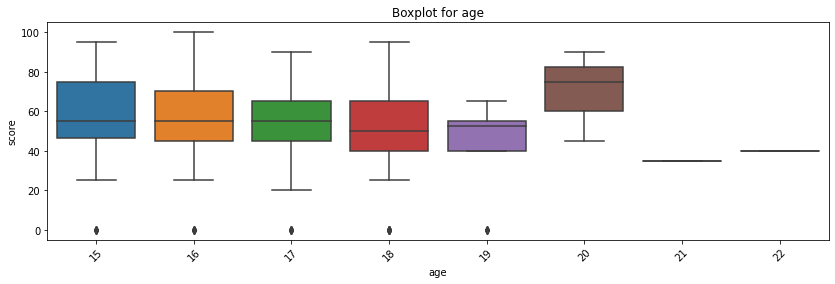

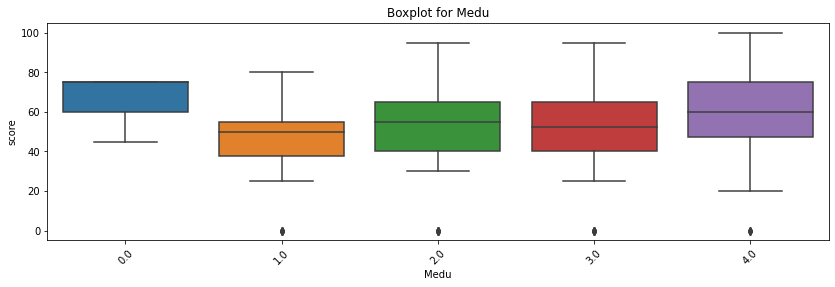

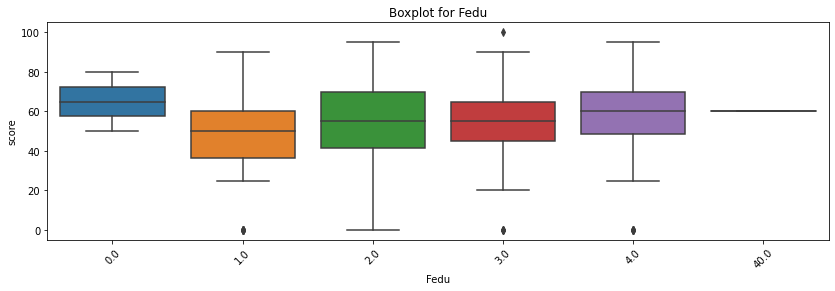

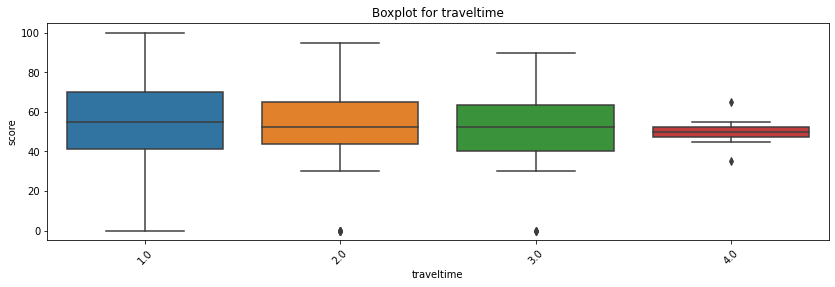

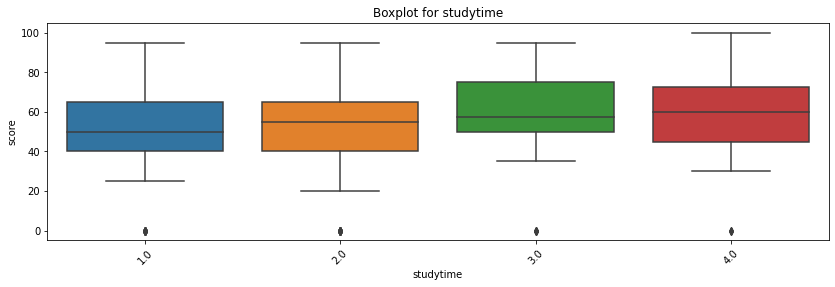

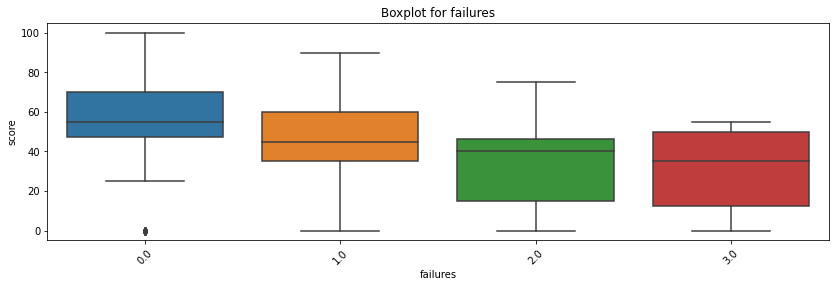

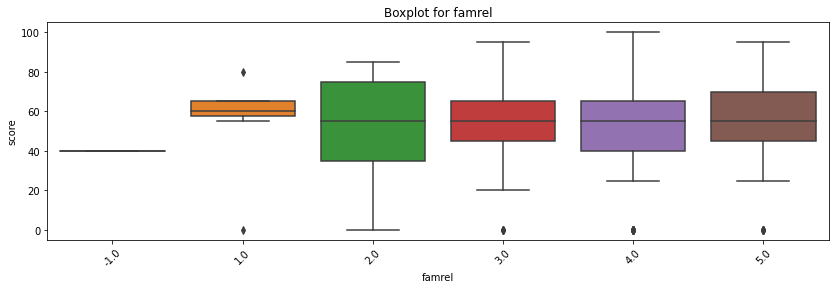

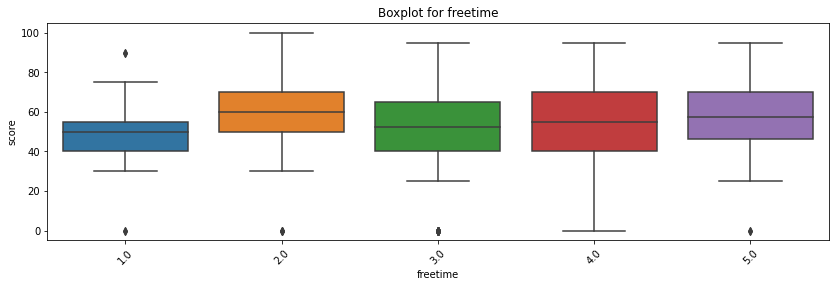

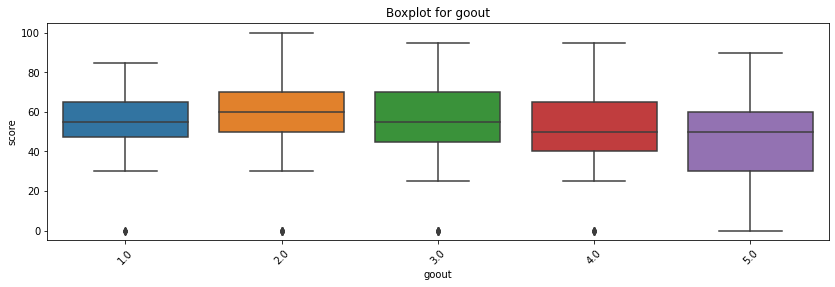

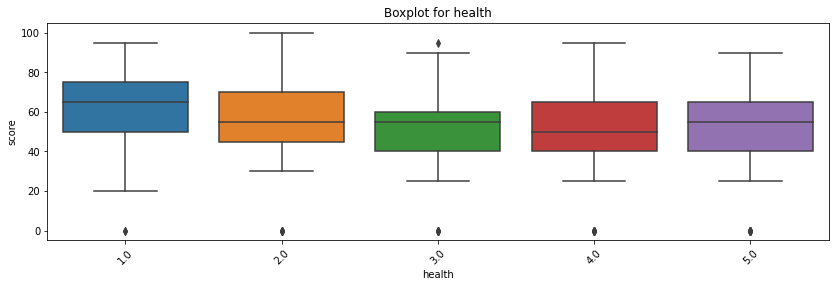

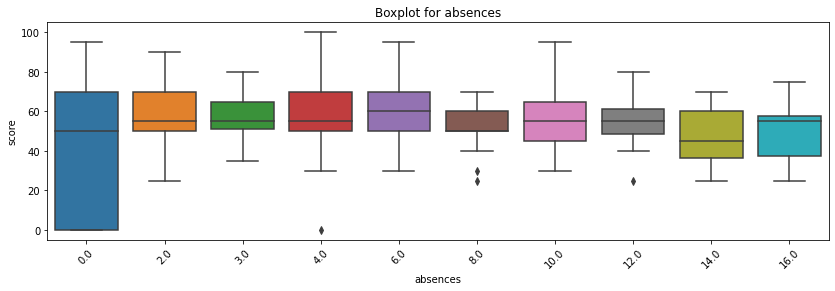

In [193]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

In [194]:
df2.loc[(df2.Fedu == 40), 'Fedu'] = 4 # исправление технической ошибки, скорее всего ошибочно внесён "0" после цифры 4
df2.loc[(df2.famrel == -1), 'famrel'] = 1 # исправление технической ошибки, скорее всего ошибочно внесён "-" перед цифрой 1

In [195]:
df2.absences.value_counts().sort_index(ascending=False)

385.0      1
212.0      1
75.0       1
56.0       1
54.0       1
40.0       1
38.0       1
30.0       1
28.0       1
26.0       1
25.0       1
24.0       1
23.0       1
22.0       3
21.0       1
20.0       4
19.0       1
18.0       5
17.0       1
16.0       7
15.0       2
14.0      12
13.0       2
12.0      12
11.0       2
10.0      17
9.0        3
8.0       21
7.0        6
6.0       31
5.0        5
4.0       65
3.0        8
2.0       60
1.0        3
0.0      111
Name: absences, dtype: int64

In [196]:
df2 = df2.query("absences not in [385, 212]") # удаление явных выбросов 

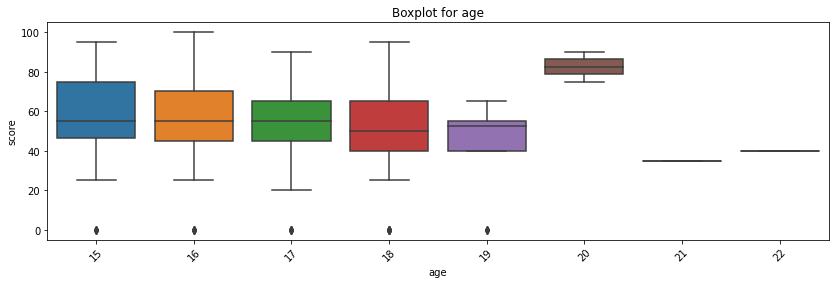

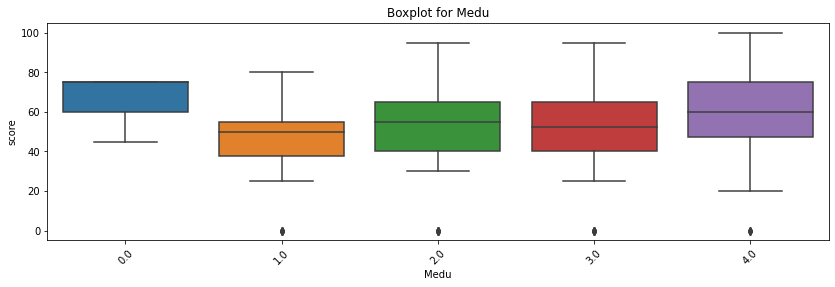

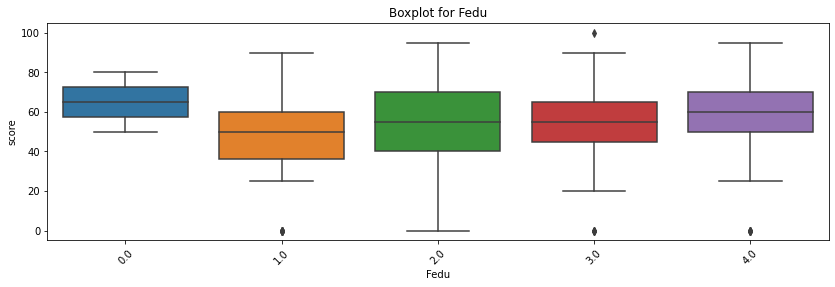

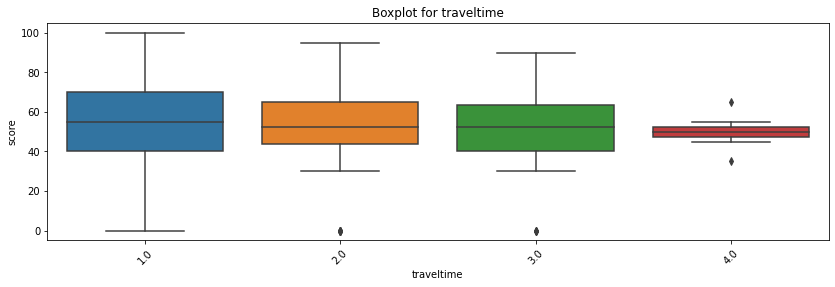

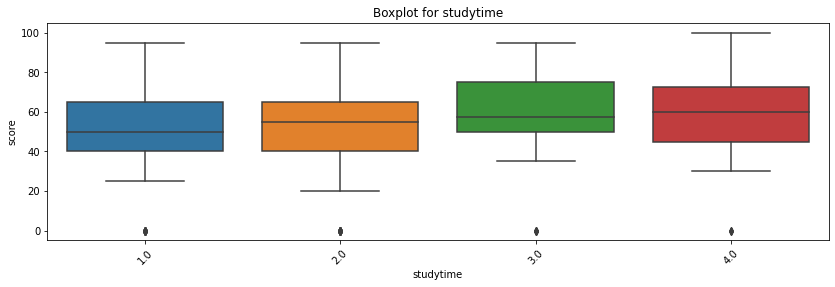

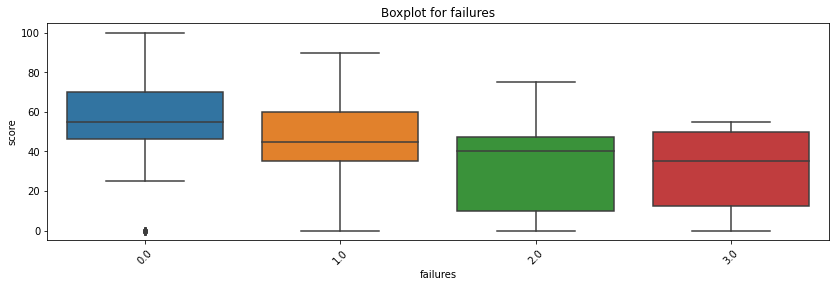

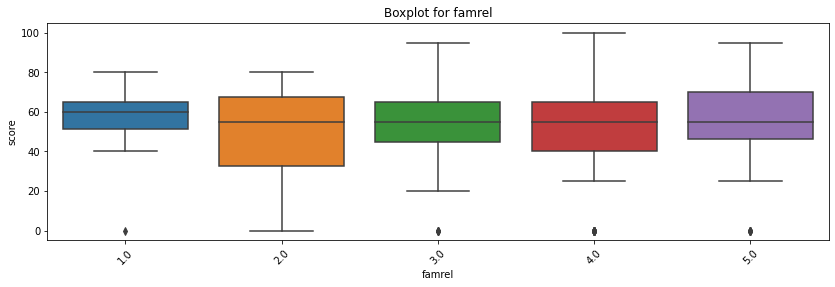

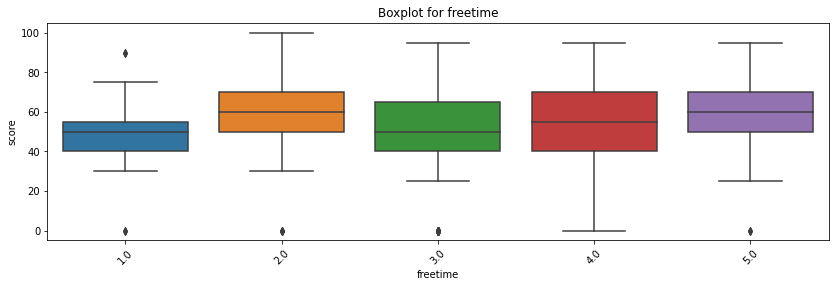

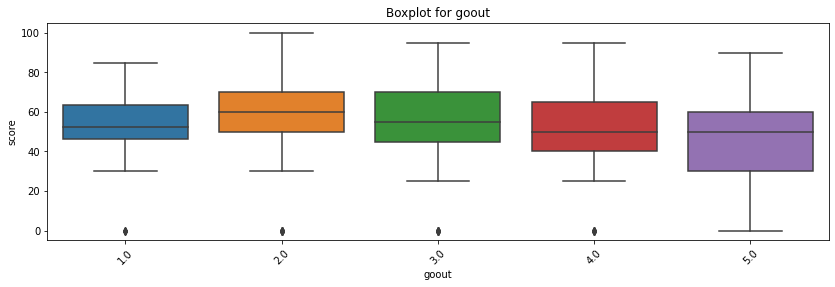

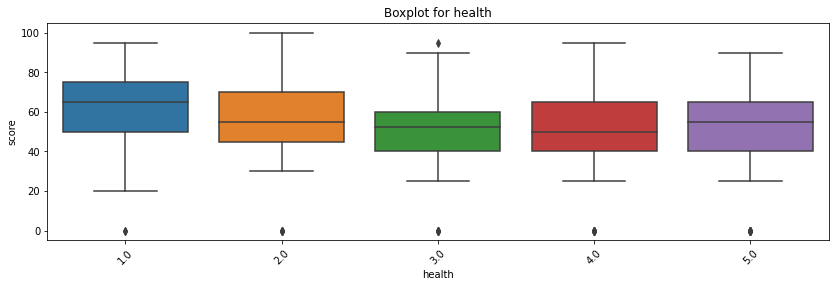

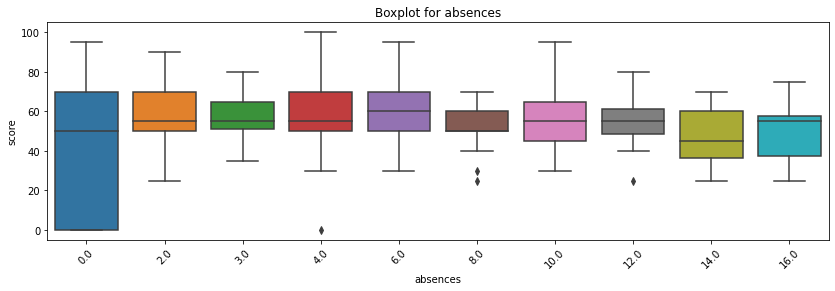

In [197]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

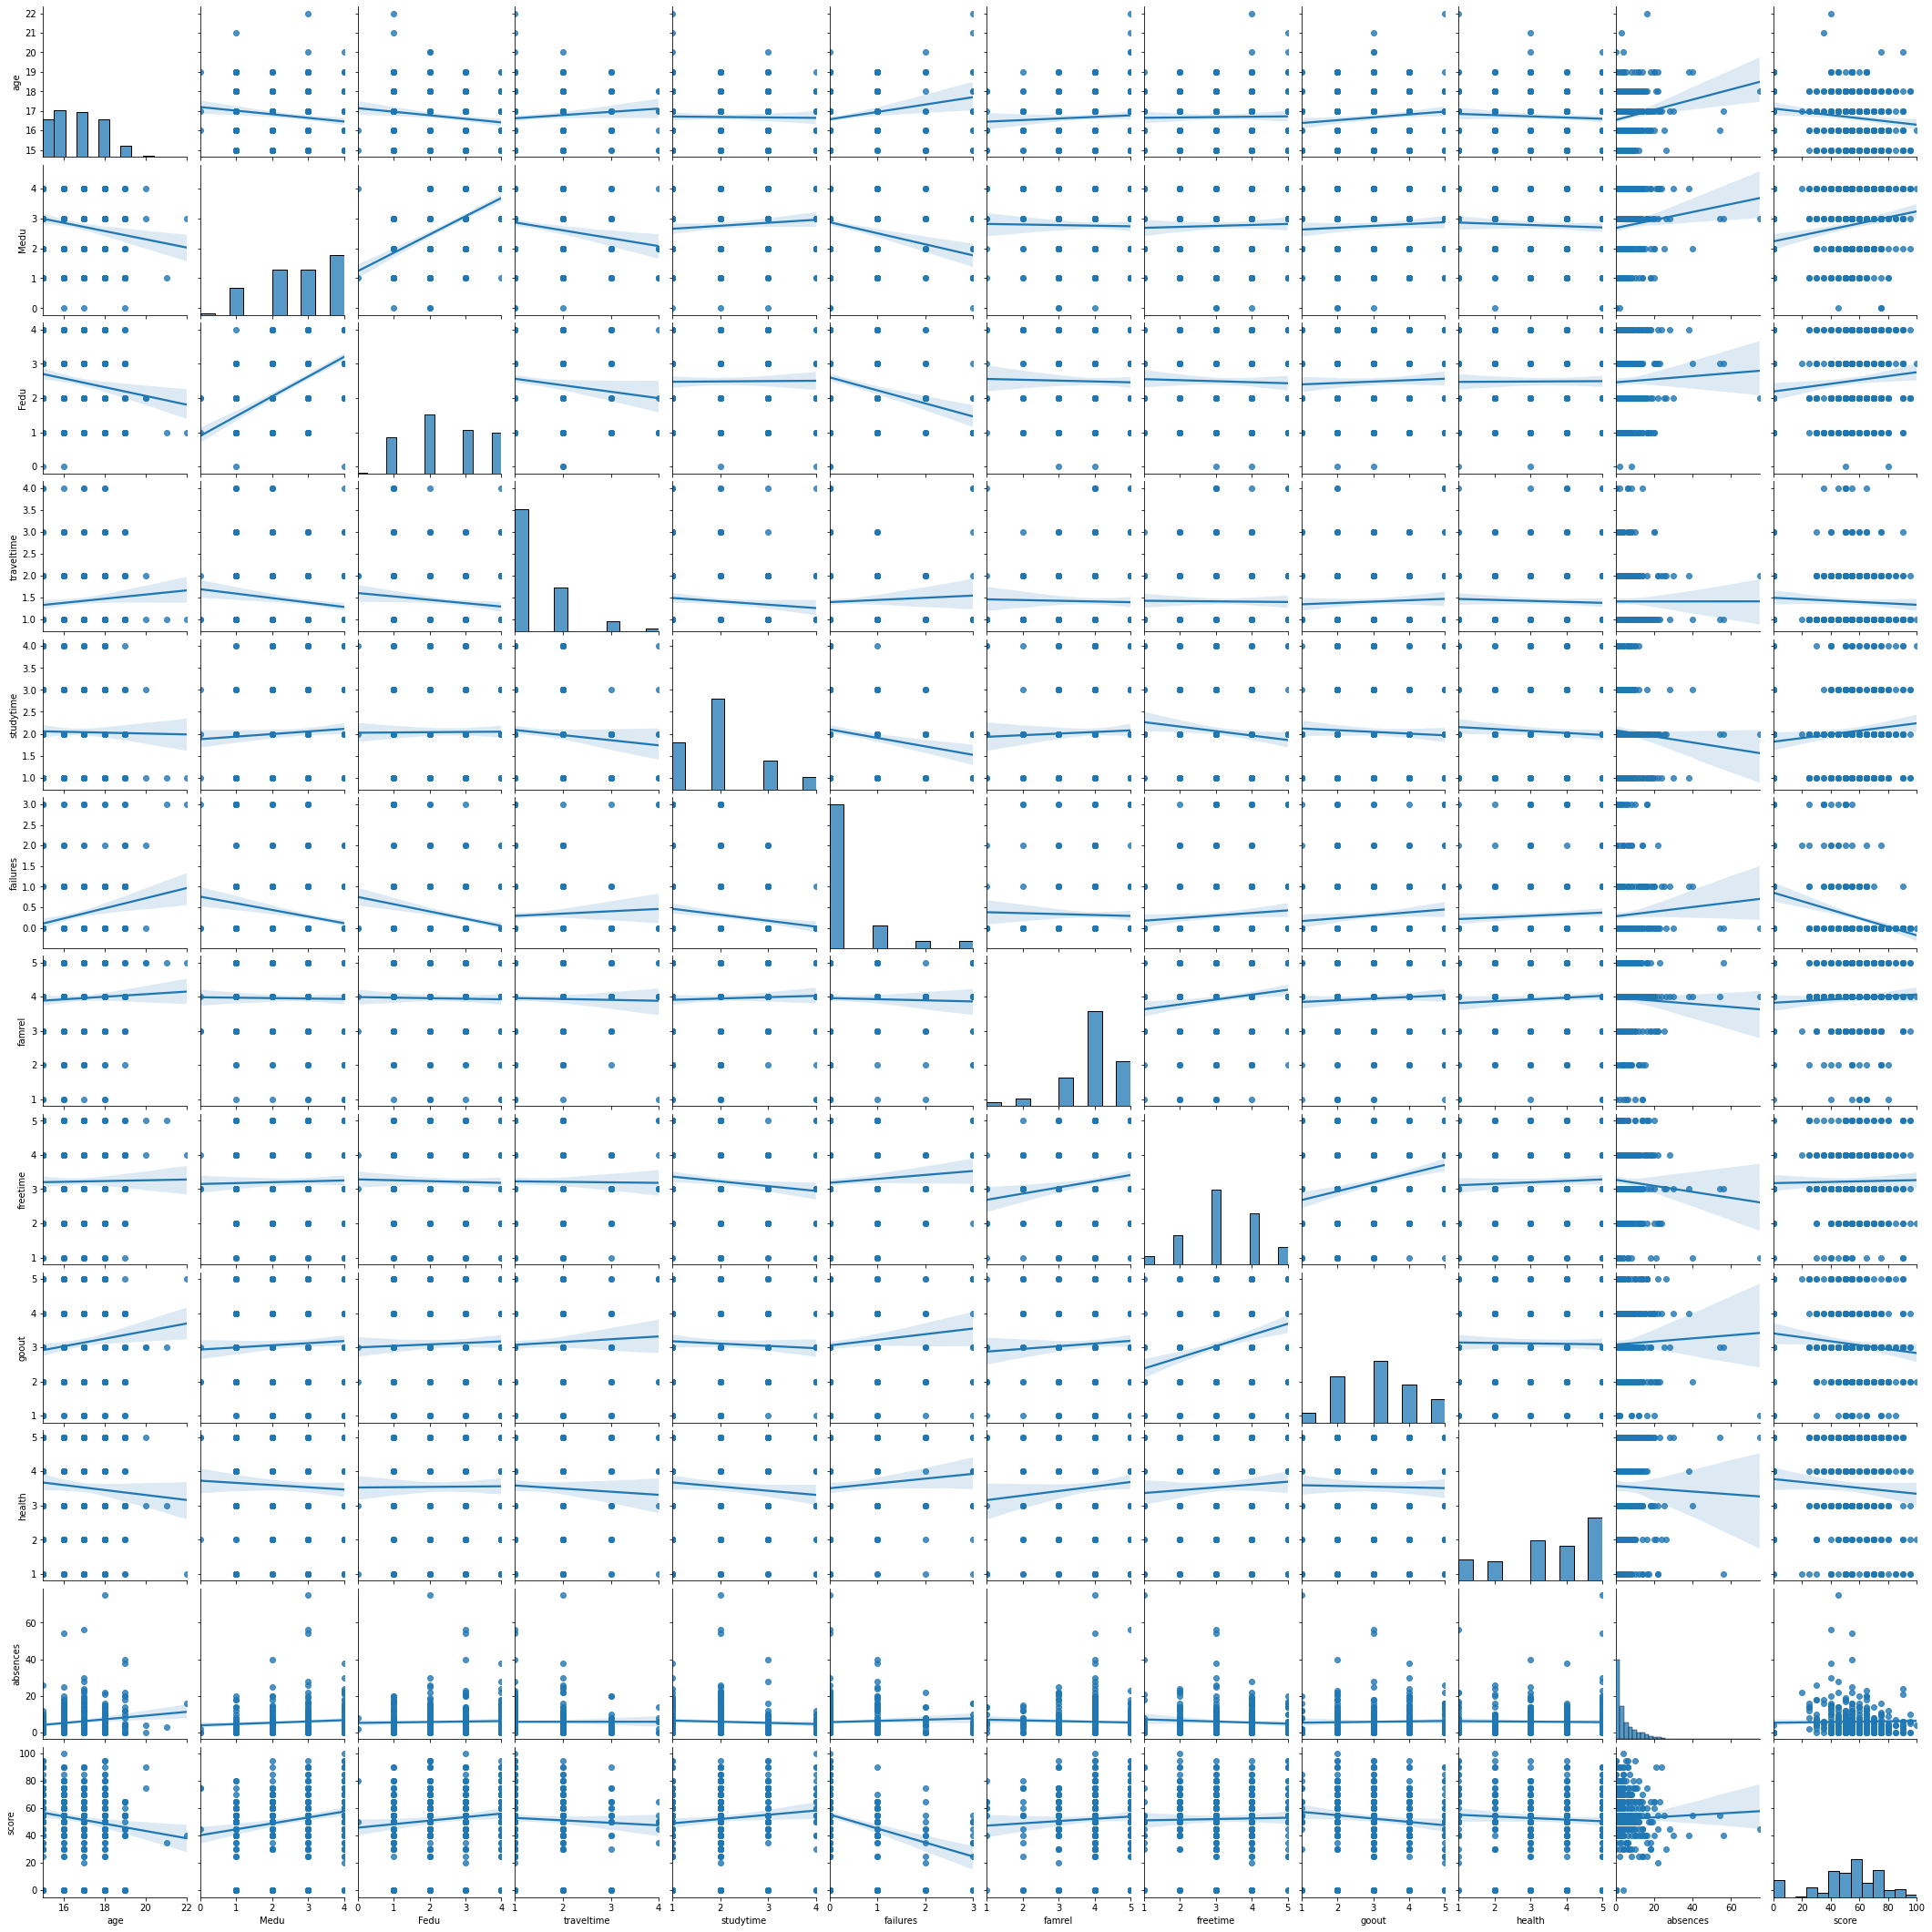

In [198]:
sns.pairplot(df2, kind = 'reg')

In [199]:
df2.corr() # параметры Medu, Fedu, studytime представляют интерес для дальнейшего изучения и постороения модели 
# но мы оставим все параметры даже с незначительной положительной корреляцией

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.159408,-0.152554,0.088761,-0.015255,0.215679,0.055183,0.014402,0.127950,-0.067228,0.163111,-0.148801
Medu,-0.159408,1.000000,0.594212,-0.163330,0.076984,-0.243840,-0.015797,0.029138,0.061856,-0.051196,0.096686,0.208351
Fedu,-0.152554,0.594212,1.000000,-0.120768,0.007762,-0.259445,-0.020112,-0.027617,0.042622,0.007011,0.033630,0.120906
traveltime,0.088761,-0.163330,-0.120768,1.000000,-0.094864,0.052967,-0.020799,-0.010127,0.050421,-0.045009,0.000354,-0.053730
studytime,-0.015255,0.076984,0.007762,-0.094864,1.000000,-0.167568,0.037830,-0.119337,-0.051498,-0.073707,-0.065978,0.114818
failures,0.215679,-0.243840,-0.259445,0.052967,-0.167568,1.000000,-0.027212,0.084878,0.108124,0.074023,0.061788,-0.326261
famrel,0.055183,-0.015797,-0.020112,-0.020799,0.037830,-0.027212,1.000000,0.160481,0.061778,0.083385,-0.042087,0.063336
freetime,0.014402,0.029138,-0.027617,-0.010127,-0.119337,0.084878,0.160481,1.000000,0.290287,0.059086,-0.071490,0.020646
goout,0.127950,0.061856,0.042622,0.050421,-0.051498,0.108124,0.061778,0.290287,1.000000,-0.016985,0.032760,-0.119067
health,-0.067228,-0.051196,0.007011,-0.045009,-0.073707,0.074023,0.083385,0.059086,-0.016985,1.000000,-0.023649,-0.071268


In [200]:
# Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам неразличимы:
# Как мы видим, серьёзно отличаются шесть параметров: пол ученика, тип адреса ученика, работа матери, дополнительные платные занятия по математике, желание получить высшее образование, а также нахождение в романтических отношениях  
# Оставим эти переменные в датасете для дальнейшего построения модели.
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason','guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [205]:
# сохраняем промежуточный датасет с отобранными признаками для дальнейшего построения модели
selected_columns = ['sex','address', 'Medu', 'Fedu','Mjob', 'famrel', 'studytime', 'freetime', 'absences', 'paid', 'higher', 'romantic']
df3 = pd.DataFrame(df2, columns=selected_columns) 

In [208]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        393 non-null    object 
 1   address    393 non-null    object 
 2   Medu       393 non-null    float64
 3   Fedu       393 non-null    float64
 4   Mjob       393 non-null    object 
 5   famrel     393 non-null    float64
 6   studytime  393 non-null    float64
 7   freetime   393 non-null    float64
 8   absences   393 non-null    float64
 9   paid       393 non-null    object 
 10  higher     393 non-null    object 
 11  romantic   393 non-null    object 
dtypes: float64(6), object(6)
memory usage: 39.9+ KB
